In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [2]:
# Load the dataset
df = pd.read_csv("CAR DETAILS.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(3577, 8)

In [5]:
name = df["name"].str.split(" ", expand = True)
df["car_maker"] = name[0]
df["car_model"] = name[1]

In [6]:
# Calculate car age
df["car_age"] = 2023 - df["year"]
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_maker', 'car_model', 'car_age'],
      dtype='object')

In [7]:
df.drop(["name"], axis=1, inplace=True)

In [8]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_maker', 'car_model', 'car_age'],
      dtype='object')

In [9]:
# Encode categorical columns
encoder = LabelEncoder()
df1 = df.apply(encoder.fit_transform)
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_maker,car_model,car_age
0,13,17,474,4,1,1,0,18,6,13
1,13,60,335,4,1,1,0,18,164,13
2,18,236,607,1,1,1,0,10,161,8
3,23,114,309,4,1,1,0,5,125,3
4,20,193,681,1,1,1,2,9,17,6


In [10]:
# Encoding data with get dummies
df = pd.get_dummies(df1, drop_first=True, columns=df1.columns.difference(['selling_price', 'km_driven', 'year','car_age']))
df.head()

,year,selling_price,km_driven,car_age,car_maker_1,car_maker_2,car_maker_3,car_maker_4,car_maker_5,car_maker_6,...,fuel_2,fuel_3,fuel_4,owner_1,owner_2,owner_3,owner_4,seller_type_1,seller_type_2,transmission_1
0,13,17,474,13,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1,13,60,335,13,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
2,18,236,607,8,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,23,114,309,3,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,True
4,20,193,681,6,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True


In [11]:
# Split data into features and target
X = df1.drop("selling_price", axis=1)
y = df1["selling_price"]

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [13]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

In [14]:
df1.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_maker', 'car_model', 'car_age'],
      dtype='object')

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_models(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f"Evaluating {name}:")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("MAE:", mae)
        print("MSE:", mse)
        print("R2 Score:", r2)
        print("Training Score: ", model.score(X_train, y_train))
        print("Testing Score: ", model.score(X_test, y_test))
        print()
        
# Call the function to evaluate models        
evaluate_models(models, X_train, y_train, X_test, y_test)

Evaluating Linear Regression:
MAE: 51.06503176029566
MSE: 4257.526354110718
R2 Score: 0.5824999425695259
Training Score:  0.6237315377258141
Testing Score:  0.5824999425695259

Evaluating Ridge Regression:
MAE: 51.054521762989914
MSE: 4255.526901535196
R2 Score: 0.5826960121873461
Training Score:  0.6237295470661771
Testing Score:  0.5826960121873461

Evaluating Lasso Regression:
MAE: 50.985785288493204
MSE: 4231.49309421143
R2 Score: 0.5850528069792931
Training Score:  0.6219006220018084
Testing Score:  0.5850528069792931

Evaluating KNeighbors Regressor:
MAE: 58.741061452513975
MSE: 6501.276480446929
R2 Score: 0.36247410392720303
Training Score:  0.6020454957546058
Testing Score:  0.36247410392720303

Evaluating Random Forest Regressor:
MAE: 31.463492894830186
MSE: 1868.7026424059304
R2 Score: 0.8167519363041232
Training Score:  0.9751583963891026
Testing Score:  0.8167519363041232



In [16]:
###  using hyper-perameter tuingng Random Forest Regressionrandom_state = 7, max_depth=10
rf= RandomForestRegressor(max_depth=15, random_state = 7)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=7)

In [17]:
def scores(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)
  print("MAE: ", mae)
  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("R2 Score: ", r2)

def model_score(model):
  print("Training Score: ", model.score(X_train, y_train))
  print("Testing Score: ", model.score(X_test, y_test))


In [18]:
model_score(rf)

y_pred= rf.predict(X_test)

scores(y_test,y_pred)

Training Score:  0.9681107249005543
Testing Score:  0.8191912589827344
MAE:  31.33094513947178
MSE:  1843.8272432160834
RMSE:  42.939809538656355
R2 Score:  0.8191912589827344


In [19]:
### Saving the best model using Pickle
with open('rfmodel.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [20]:
df_sample = df1.sample(n=20, random_state = 15)
df_sample.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_maker,car_model,car_age
249,24,208,212,4,1,1,0,10,74,2
1869,22,161,196,4,1,1,0,18,147,4
3319,22,264,706,1,1,1,0,23,48,4
3964,20,222,392,1,0,1,0,23,48,6
1258,23,99,257,4,1,1,0,5,125,3


In [21]:
# Saving the Sample Dataset
df_sample.to_csv("sample-dataset.csv")

In [22]:
#### Loading the best model using Pickle

# Load the saved trained ML model
with open('rfmodel.pkl', 'rb') as file:
    best_model = pickle.load(file)
best_model

RandomForestRegressor(max_depth=15, random_state=7)

In [23]:
### Selecting 20 Dependent and Independent Variable randomly from dataset

x_sample = df_sample.drop("selling_price", axis = 1)
y_sample = df_sample["selling_price"]
print(x_sample.shape)
print(y_sample.shape)

(20, 9)
(20,)


In [24]:
#### Generate the Predictions for randomly 20 points selected from dataset
ypred_sample = best_model.predict(x_sample)
ypred_sample

array([210.91658194, 179.35282127, 240.32495064, 227.59514366,
       117.18531499,  46.0075    ,  43.19852485,  60.07664912,
        23.74152686, 113.21717316, 247.10031075, 150.9       ,
       126.91152066,  21.8295    , 130.19077883, 100.75923106,
       281.18836771,  59.57250376, 139.63121265, 140.28710606])

In [25]:
model_score(best_model)

scores(y_sample,ypred_sample)

Training Score:  0.9681107249005543
Testing Score:  0.8191912589827344
MAE:  9.895925604263818
MSE:  160.00931445664713
RMSE:  12.649478821542298
R2 Score:  0.9752738165800043


In [26]:
# Perform cross-validation for the RandomForestRegressor
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
print("Cross-Validation MSE Scores:", cv_mse_scores)
print("Mean MSE:", cv_mse_scores.mean())

Cross-Validation MSE Scores: [1740.84522669 1533.18679104 1656.59302132 1555.74893605 2095.05072266]
Mean MSE: 1716.2849395514138


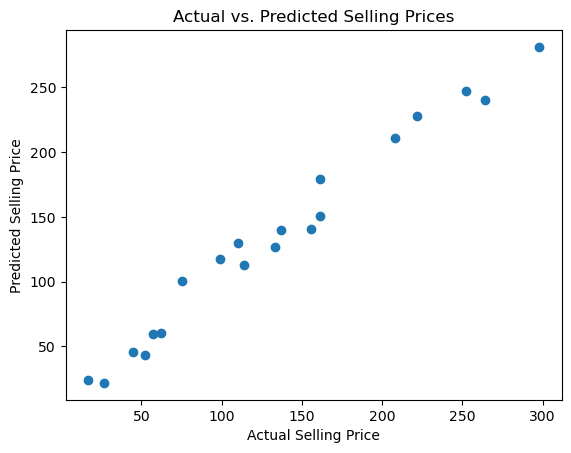

In [27]:
# Visualize predicted vs. actual selling prices
plt.scatter(y_sample, ypred_sample)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.show()